# <font style="color:blue">Assignment: Implement a CNN for Image Classification on CIFAR10 dataset</font>

We have seen how to implement a CNN (LeNet5 and LeNet with the batch norm) in the last section. We used MNIST and Fashion MNIST dataset which are grayscale or single channel datasets. In this assignment, you will implement a CNN Model ( similar to LeNet ) for classifying objects in the `CIFAR10` dataset. 

The CIFAR10 dataset has the following properties
1. It has `10` classes.  
1. It has colored images, so it has `3-channels`. 
1. The image shape is `32 x 32`.

Samples of CIFAR10- dataset ([source](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html?highlight=cifar)):

<img src="https://www.learnopencv.com/wp-content/uploads/2020/01/c3_w3_cirar10.png" width=700>


# <font color='blue'>Marking Scheme</font>

### <font style="color:green">Maximum Points: 30

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Problem</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Implement the CNN Model</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Find Mean and Std of Training Data</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Model Training & Accuracy</h3></td> <td><h3>15</h3></td> </tr>
    </table>
</div>


# <font color='blue'>Problem Description</font>

### <font color='blue'>1. Implement the CNN Model</font>
Since the task is to classify objects in a dataset of color images, you need to implement a CNN with 10 output classes. **Also, your model must use `Conv2d`, `BatchNorm2d`, and `ReLU`.** 

**You need to define the model architecture in the function: `MyModel` ( Step 1 )**

Hint: For color images you need to use an input shape that is different than the ones we have been using till now, so that it accepts 3 channel inputs.

### <font color='blue'>2. Find Mean and Std of Training Data</font>

It is a good practice to normalize the training data. To normalize the data, we need to compute mean and std. As the dataset has colored images, it has `3-channel` (RGB or BGR). We have to find mean and std per channel using training data. 

**You need to compute the mean and std for the dataset in the function: `get_mean_std_train_data` ( Step 3 )**

### <font color='blue'>3. Model Training and Accuracy</font>

Once you have defined the model, you can train it. To get better accuracy, you need to play around the training configuration **( Step 5 )** and even the model architecture. You can check the accuracy by running the training loop in `Step 11`.

Here are a few hints on how you can improve the accuracy:
- Train for longer duration
- Try with different learning rate
- Try to add more convolutional layers to the architecture
- Try to add more nodes in the layers.

You need to achieve **75% accuracy** ( See Step11 ) in order to get full marks for this part. 

**You do not need to implement anything for this, just changing the parameters as mentioned above and running the Notebook will give you the accuracy. ( Step 5 and Step 11 )**

In [1]:
required_training = True

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt  # one of the best graphics library for python

In [4]:
import os
import time

from typing import Iterable
from dataclasses import dataclass

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, transforms
import torchvision

# <font style="color:blue">1. CNN Model Architecture [10 Points]</font>

You have to write the model code here. You can take reference from LeNet code.

If you do not get higher accuracy, here are a few hints:
- Try to add more convolutional layers to the architecture
- Try to add more nodes in the layers.


In [5]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()

        ###
        ### YOUR CODE HERE
        self.body = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = 5),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size = 2),
            
            nn.Conv2d(in_channels = 16, out_channels = 64, kernel_size = 5),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size = 2),
            
        )
        
        self.head = nn.Sequential(
            nn.Linear(in_features=64*5*5, out_features=256),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=256, out_features=128),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=128, out_features=10)
        )
        ###
        
    def forward(self, x):
        ###
        ### YOUR CODE HERE
        x = self.body(x)
        x = x.view(x.size()[0], -1)
        x = self.head(x)
        ###
        
        return x

# <font style="color:blue">2. Display the Network</font>

In [6]:
my_model = MyModel()
print(my_model)

MyModel(
  (body): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 64, kernel_size=(5, 5), stride=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (head): Sequential(
    (0): Linear(in_features=1600, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [7]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [8]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [9]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [10]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# <font style="color:blue">3. Find Mean and STD of CIFAR10 Data [5 Points]</font>

Function **`get_mean_std_train_data`** should `return` `mean` and `std` of training data. You can refer to the code used in the previous section for finding the mean and std of the training data.



In [11]:
def get_mean_std_train_data(data_root):
    
    train_transform = transforms.Compose([transforms.ToTensor()])
    train_set = datasets.CIFAR10(root=data_root, train=True, download=False, transform=train_transform)
    
    # return mean (numpy.ndarray) and std (numpy.ndarray)
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    
    ###
    ### YOUR CODE HERE
    image_means = torch.stack([t.mean(1).mean(1) for t, c in train_set])
    mean = image_means.mean(0)
    
    image_std = torch.stack([t.std(1).std(1) for t, c in train_set])
    std = image_std.std(0)
    ###
    
    return mean, std



In [12]:
# get_mean_std_train_data("../resource/lib/publicdata/images")

In [13]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [14]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [15]:
def get_data(batch_size, data_root, num_workers=1):
    
    
    try:
        mean, std = get_mean_std_train_data(data_root)
        assert len(mean) == len(std) == 3
    except:
        mean = np.array([0.5, 0.5, 0.5])
        std = np.array([0.5, 0.5, 0.5])
        
    
    train_test_transforms = transforms.Compose([
        # this re-scale image tensor values between 0-1. image_tensor /= 255
        transforms.ToTensor(),
        # subtract mean and divide by variance.
        transforms.Normalize(mean, std)
    ])
    
    # train dataloader
    train_loader = torch.utils.data.DataLoader(
        datasets.CIFAR10(root=data_root, train=True, download=False, transform=train_test_transforms),
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers
    )
    
    # test dataloader
    test_loader = torch.utils.data.DataLoader(
        datasets.CIFAR10(root=data_root, train=False, download=False, transform=train_test_transforms),
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers
    )
    return train_loader, test_loader

# <font style="color:blue">4. System Configuration</font>


In [16]:
@dataclass
class SystemConfiguration:
    '''
    Describes the common system setting needed for reproducible training
    '''
    seed: int = 42  # seed number to set the state of all random number generators
    cudnn_benchmark_enabled: bool = True  # enable CuDNN benchmark for the sake of performance
    cudnn_deterministic: bool = True  # make cudnn deterministic (reproducible training)

# <font style="color:blue">5. Training Configuration [15 Points]</font>
All training parameters are defined here. So, 
This is where you can improve your accuracy, apart from improving the architecture. 

Here are a few hints on how you can improve the accuracy:
- Train for longer duration
- Try with different learning rate

**You need to achieve 75% accuracy in order to get full marks for this part.**

**You will see the effect of these changes when you run Step 11**

In [17]:
@dataclass
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''
    batch_size: int = 16  # amount of data to pass through the network at each forward-backward iteration
    epochs_count: int = 50  # number of times the whole dataset will be passed through the network
    learning_rate: float = 0.01  # determines the speed of network's weights update
        
    log_interval: int = 100  # how many batches to wait between logging training status
    test_interval: int = 1  # how many epochs to wait before another test. Set to 1 to get val loss at each epoch
    data_root: str = "../resource/lib/publicdata/images"  # folder to save data
    num_workers: int = 10  # number of concurrent processes using to prepare data
    device: str = 'cuda'  # device to use for training.
    # update changed parameters in blow coding block.
    # Please do not change "data_root" 
    
    ###
    ### YOUR CODE HERE
    ###


# <font style="color:blue">6. System Setup</font>


In [18]:
def setup_system(system_config: SystemConfiguration) -> None:
    torch.manual_seed(system_config.seed)
    if torch.cuda.is_available():
        torch.backends.cudnn_benchmark_enabled = system_config.cudnn_benchmark_enabled
        torch.backends.cudnn.deterministic = system_config.cudnn_deterministic

# <font style="color:blue">7. Training</font>
We are familiar with the training pipeline used in PyTorch. The following steps are performed in the code below:

1. Send the data to the required device ( CPU/GPU )
1. Make a forward pass using the forward method.
1. Find the loss using the Cross_Entropy function.
1. Find the gradients using the backward function.
1. Update the weights using the optimizer.
1. Find the accuracy of the model

Repeat the above for the specified number of epochs.

In [19]:
def train(
    train_config: TrainingConfiguration, model: nn.Module, optimizer: torch.optim.Optimizer,
    train_loader: torch.utils.data.DataLoader, epoch_idx: int
) -> None:
    
    # change model in training mood
    model.train()
    
    # to get batch loss
    batch_loss = np.array([])
    
    # to get batch accuracy
    batch_acc = np.array([])
        
    for batch_idx, (data, target) in enumerate(train_loader):
        
        # clone target
        indx_target = target.clone()
        # send data to device (its is medatory if GPU has to be used)
        data = data.to(train_config.device)
        # send target to device
        target = target.to(train_config.device)

        # reset parameters gradient to zero
        optimizer.zero_grad()
        
        # forward pass to the model
        output = model(data)
        
        # cross entropy loss
        loss = F.cross_entropy(output, target)
        
        # find gradients w.r.t training parameters
        loss.backward()
        # Update parameters using gardients
        optimizer.step()
        
        batch_loss = np.append(batch_loss, [loss.item()])
        
        # Score to probability using softmax
        prob = F.softmax(output, dim=1)
            
        # get the index of the max probability
        pred = prob.data.max(dim=1)[1]  
                        
        # correct prediction
        correct = pred.cpu().eq(indx_target).sum()
            
        # accuracy
        acc = float(correct) / float(len(data))
        
        batch_acc = np.append(batch_acc, [acc])

        if batch_idx % train_config.log_interval == 0 and batch_idx > 0:              
            print(
                'Train Epoch: {} [{}/{}] Loss: {:.6f} Acc: {:.4f}'.format(
                    epoch_idx, batch_idx * len(data), len(train_loader.dataset), loss.item(), acc
                )
            )
            
    epoch_loss = batch_loss.mean()
    epoch_acc = batch_acc.mean()
    return epoch_loss, epoch_acc

# <font style="color:blue">8. Validation</font>

After every few epochs **`validation`** will be called with the `trained model` and `test_loader` to get validation loss and accuracy.

In [20]:
def validate(
    train_config: TrainingConfiguration,
    model: nn.Module,
    test_loader: torch.utils.data.DataLoader,
) -> float:
    model.eval()
    test_loss = 0
    count_corect_predictions = 0
    for data, target in test_loader:
        indx_target = target.clone()
        data = data.to(train_config.device)
        
        target = target.to(train_config.device)
        
        output = model(data)
        # add loss for each mini batch
        test_loss += F.cross_entropy(output, target).item()
        
        # Score to probability using softmax
        prob = F.softmax(output, dim=1)
        
        # get the index of the max probability
        pred = prob.data.max(dim=1)[1] 
        
        # add correct prediction count
        count_corect_predictions += pred.cpu().eq(indx_target).sum()

    # average over number of mini-batches
    test_loss = test_loss / len(test_loader)  
    
    # average over number of dataset
    accuracy = 100. * count_corect_predictions / len(test_loader.dataset)
    
    print(
        '\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, count_corect_predictions, len(test_loader.dataset), accuracy
        )
    )
    return test_loss, accuracy/100.0

# <font style="color:blue">9. Saving the Model</font>

In [21]:
def save_model(model, device, model_dir='models', model_file_name='cifar10_cnn_model.pt'):
    

    if not os.path.exists(model_dir):
        os.makedirs(model_dir)

    model_path = os.path.join(model_dir, model_file_name)

    # make sure you transfer the model to cpu.
    if device == 'cuda':
        model.to('cpu')

    # save the state_dict
    torch.save(model.state_dict(), model_path)
    
    if device == 'cuda':
        model.to('cuda')
    
    return

# <font style="color:blue">10. Main</font>

In this section of code, we use the configuration parameters defined above and start the training. Here are the important actions being taken in the code below:

1. Set up system parameters like CPU/GPU, number of threads etc
1. Load the data using dataloaders
1. Create an instance of the LeNet model
1. Specify optimizer to use.
1. Set up variables to track loss and accuracy and start training.
1. If loss decreases, saving the model

In [22]:
def main(system_configuration=SystemConfiguration(), training_configuration=TrainingConfiguration()):
    
    # system configuration
    setup_system(system_configuration)

    # batch size
    batch_size_to_set = training_configuration.batch_size
    # num_workers
    num_workers_to_set = training_configuration.num_workers
    # epochs
    epoch_num_to_set = training_configuration.epochs_count

    # if GPU is available use training config, 
    # else lowers batch_size, num_workers and epochs count
    if torch.cuda.is_available():
        device = "cuda"
    else:
        device = "cpu"
        num_workers_to_set = 2

    # data loader
    train_loader, test_loader = get_data(
        batch_size=training_configuration.batch_size,
        data_root=training_configuration.data_root,
        num_workers=num_workers_to_set
    )
    
    # Update training configuration
    training_configuration = TrainingConfiguration(
        device=device,
        num_workers=num_workers_to_set
    )

    # initiate model
    model = MyModel()
        
    # send model to device (GPU/CPU)
    model.to(training_configuration.device)

    # optimizer
    optimizer = optim.SGD(
        model.parameters(),
        lr=training_configuration.learning_rate
    )

    best_loss = torch.tensor(np.inf)
    best_accuracy = torch.tensor(0)
    
    # epoch train/test loss
    epoch_train_loss = np.array([])
    epoch_test_loss = np.array([])
    
    # epch train/test accuracy
    epoch_train_acc = np.array([])
    epoch_test_acc = np.array([])
    
    # trainig time measurement
    t_begin = time.time()
    for epoch in range(training_configuration.epochs_count):
        
        train_loss, train_acc = train(training_configuration, model, optimizer, train_loader, epoch)
        
        epoch_train_loss = np.append(epoch_train_loss, [train_loss])
        
        epoch_train_acc = np.append(epoch_train_acc, [train_acc])

        elapsed_time = time.time() - t_begin
        speed_epoch = elapsed_time / (epoch + 1)
        speed_batch = speed_epoch / len(train_loader)
        eta = speed_epoch * training_configuration.epochs_count - elapsed_time
        
        print(
            "Elapsed {:.2f}s, {:.2f} s/epoch, {:.2f} s/batch, ets {:.2f}s".format(
                elapsed_time, speed_epoch, speed_batch, eta
            )
        )

        if epoch % training_configuration.test_interval == 0:
            current_loss, current_accuracy = validate(training_configuration, model, test_loader)
            
            epoch_test_loss = np.append(epoch_test_loss, [current_loss])
        
            epoch_test_acc = np.append(epoch_test_acc, [current_accuracy])
            
            if current_loss < best_loss:
                best_loss = current_loss
            
            if current_accuracy > best_accuracy:
                best_accuracy = current_accuracy
                print('Accuracy improved, saving the model.\n')
                save_model(model, device)
            
                
    print("Total time: {:.2f}, Best Loss: {:.3f}, Best Accuracy: {:.3f}".format(time.time() - t_begin, best_loss, 
                                                                                best_accuracy))
    
    return model, epoch_train_loss, epoch_train_acc, epoch_test_loss, epoch_test_acc

In [23]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# <font style="color:blue">Step 11: Start Training</font>
This is where you start the training. You may see that the training does not converge or does not give a good accuracy. You need to change 
- In Step 1: the network architecture and add a few more layers or more nodes to the already existing layers
- In Step 5: training parameters such as learning rate or batch_size or epochs so that the network converges or run the network for longer so that it gets more time to fit the data

**You need to make sure that the accuracy at the end is at least 75%.**

In [24]:
if required_training:
    model, epoch_train_loss, epoch_train_acc, epoch_test_loss, epoch_test_acc = main()

Train Epoch: 0 [1600/50000] Loss: 2.266490 Acc: 0.1875
Train Epoch: 0 [3200/50000] Loss: 1.976810 Acc: 0.1875
Train Epoch: 0 [4800/50000] Loss: 1.538387 Acc: 0.5625
Train Epoch: 0 [6400/50000] Loss: 1.727487 Acc: 0.3125
Train Epoch: 0 [8000/50000] Loss: 1.600228 Acc: 0.4375
Train Epoch: 0 [9600/50000] Loss: 1.315786 Acc: 0.3750
Train Epoch: 0 [11200/50000] Loss: 1.719422 Acc: 0.1875
Train Epoch: 0 [12800/50000] Loss: 1.585712 Acc: 0.5000
Train Epoch: 0 [14400/50000] Loss: 1.435912 Acc: 0.3125
Train Epoch: 0 [16000/50000] Loss: 1.502356 Acc: 0.3750
Train Epoch: 0 [17600/50000] Loss: 1.087530 Acc: 0.6250
Train Epoch: 0 [19200/50000] Loss: 1.831149 Acc: 0.2500
Train Epoch: 0 [20800/50000] Loss: 1.048182 Acc: 0.5625
Train Epoch: 0 [22400/50000] Loss: 1.782965 Acc: 0.4375
Train Epoch: 0 [24000/50000] Loss: 0.995813 Acc: 0.6875
Train Epoch: 0 [25600/50000] Loss: 1.000976 Acc: 0.8125
Train Epoch: 0 [27200/50000] Loss: 1.507758 Acc: 0.5625
Train Epoch: 0 [28800/50000] Loss: 1.275683 Acc: 0.500

Train Epoch: 4 [20800/50000] Loss: 0.755048 Acc: 0.8125
Train Epoch: 4 [22400/50000] Loss: 0.531642 Acc: 0.8125
Train Epoch: 4 [24000/50000] Loss: 0.937861 Acc: 0.7500
Train Epoch: 4 [25600/50000] Loss: 0.691422 Acc: 0.6875
Train Epoch: 4 [27200/50000] Loss: 0.895158 Acc: 0.6250
Train Epoch: 4 [28800/50000] Loss: 0.794406 Acc: 0.6250
Train Epoch: 4 [30400/50000] Loss: 1.642938 Acc: 0.5625
Train Epoch: 4 [32000/50000] Loss: 0.188386 Acc: 1.0000
Train Epoch: 4 [33600/50000] Loss: 0.513072 Acc: 0.8750
Train Epoch: 4 [35200/50000] Loss: 0.487537 Acc: 0.8750
Train Epoch: 4 [36800/50000] Loss: 1.191493 Acc: 0.5625
Train Epoch: 4 [38400/50000] Loss: 0.518916 Acc: 0.8125
Train Epoch: 4 [40000/50000] Loss: 0.897439 Acc: 0.7500
Train Epoch: 4 [41600/50000] Loss: 0.658374 Acc: 0.8125
Train Epoch: 4 [43200/50000] Loss: 0.937753 Acc: 0.6250
Train Epoch: 4 [44800/50000] Loss: 0.704165 Acc: 0.6875
Train Epoch: 4 [46400/50000] Loss: 0.545505 Acc: 0.8125
Train Epoch: 4 [48000/50000] Loss: 0.920128 Acc:

Train Epoch: 8 [41600/50000] Loss: 0.351039 Acc: 0.8750
Train Epoch: 8 [43200/50000] Loss: 0.677381 Acc: 0.7500
Train Epoch: 8 [44800/50000] Loss: 0.466045 Acc: 0.8125
Train Epoch: 8 [46400/50000] Loss: 0.498329 Acc: 0.7500
Train Epoch: 8 [48000/50000] Loss: 0.572376 Acc: 0.8750
Train Epoch: 8 [49600/50000] Loss: 0.700865 Acc: 0.7500
Elapsed 370.24s, 41.14 s/epoch, 0.01 s/batch, ets 1686.64s

Test set: Average loss: 0.8098, Accuracy: 7338/10000 (73%)

Accuracy improved, saving the model.

Train Epoch: 9 [1600/50000] Loss: 0.705769 Acc: 0.7500
Train Epoch: 9 [3200/50000] Loss: 0.478465 Acc: 0.8125
Train Epoch: 9 [4800/50000] Loss: 0.655992 Acc: 0.8125
Train Epoch: 9 [6400/50000] Loss: 0.448906 Acc: 0.8125
Train Epoch: 9 [8000/50000] Loss: 0.798198 Acc: 0.8750
Train Epoch: 9 [9600/50000] Loss: 0.363779 Acc: 0.8125
Train Epoch: 9 [11200/50000] Loss: 0.577490 Acc: 0.8125
Train Epoch: 9 [12800/50000] Loss: 0.427700 Acc: 0.9375
Train Epoch: 9 [14400/50000] Loss: 0.350082 Acc: 0.8750
Train Ep

Train Epoch: 13 [6400/50000] Loss: 0.325646 Acc: 0.8750
Train Epoch: 13 [8000/50000] Loss: 0.033328 Acc: 1.0000
Train Epoch: 13 [9600/50000] Loss: 0.161405 Acc: 0.9375
Train Epoch: 13 [11200/50000] Loss: 0.306059 Acc: 0.9375
Train Epoch: 13 [12800/50000] Loss: 0.400662 Acc: 0.8125
Train Epoch: 13 [14400/50000] Loss: 0.123098 Acc: 1.0000
Train Epoch: 13 [16000/50000] Loss: 0.097191 Acc: 1.0000
Train Epoch: 13 [17600/50000] Loss: 0.302581 Acc: 0.8750
Train Epoch: 13 [19200/50000] Loss: 0.305100 Acc: 0.8750
Train Epoch: 13 [20800/50000] Loss: 0.168395 Acc: 0.9375
Train Epoch: 13 [22400/50000] Loss: 0.246277 Acc: 0.9375
Train Epoch: 13 [24000/50000] Loss: 0.500830 Acc: 0.9375
Train Epoch: 13 [25600/50000] Loss: 0.212789 Acc: 0.9375
Train Epoch: 13 [27200/50000] Loss: 0.206435 Acc: 0.9375
Train Epoch: 13 [28800/50000] Loss: 0.442061 Acc: 0.8125
Train Epoch: 13 [30400/50000] Loss: 0.066516 Acc: 1.0000
Train Epoch: 13 [32000/50000] Loss: 0.215412 Acc: 0.9375
Train Epoch: 13 [33600/50000] Loss

Train Epoch: 17 [25600/50000] Loss: 0.128678 Acc: 0.9375
Train Epoch: 17 [27200/50000] Loss: 0.136409 Acc: 0.9375
Train Epoch: 17 [28800/50000] Loss: 0.025574 Acc: 1.0000
Train Epoch: 17 [30400/50000] Loss: 0.147291 Acc: 0.9375
Train Epoch: 17 [32000/50000] Loss: 1.000519 Acc: 0.7500
Train Epoch: 17 [33600/50000] Loss: 0.036195 Acc: 1.0000
Train Epoch: 17 [35200/50000] Loss: 0.127229 Acc: 0.9375
Train Epoch: 17 [36800/50000] Loss: 0.528952 Acc: 0.7500
Train Epoch: 17 [38400/50000] Loss: 0.156890 Acc: 0.9375
Train Epoch: 17 [40000/50000] Loss: 0.055727 Acc: 1.0000
Train Epoch: 17 [41600/50000] Loss: 0.260902 Acc: 0.8125
Train Epoch: 17 [43200/50000] Loss: 0.142522 Acc: 0.9375
Train Epoch: 17 [44800/50000] Loss: 0.239633 Acc: 0.9375
Train Epoch: 17 [46400/50000] Loss: 0.194237 Acc: 0.9375
Train Epoch: 17 [48000/50000] Loss: 0.236111 Acc: 0.9375
Train Epoch: 17 [49600/50000] Loss: 0.090618 Acc: 0.9375
Elapsed 752.37s, 41.80 s/epoch, 0.01 s/batch, ets 1337.54s

Test set: Average loss: 1.09

Train Epoch: 21 [44800/50000] Loss: 0.267050 Acc: 0.8750
Train Epoch: 21 [46400/50000] Loss: 0.022707 Acc: 1.0000
Train Epoch: 21 [48000/50000] Loss: 0.102011 Acc: 1.0000
Train Epoch: 21 [49600/50000] Loss: 0.119474 Acc: 0.9375
Elapsed 919.87s, 41.81 s/epoch, 0.01 s/batch, ets 1170.74s

Test set: Average loss: 1.2776, Accuracy: 7303/10000 (73%)

Train Epoch: 22 [1600/50000] Loss: 0.039373 Acc: 1.0000
Train Epoch: 22 [3200/50000] Loss: 0.029210 Acc: 1.0000
Train Epoch: 22 [4800/50000] Loss: 0.044001 Acc: 1.0000
Train Epoch: 22 [6400/50000] Loss: 0.079140 Acc: 1.0000
Train Epoch: 22 [8000/50000] Loss: 0.208172 Acc: 0.8750
Train Epoch: 22 [9600/50000] Loss: 0.038680 Acc: 1.0000
Train Epoch: 22 [11200/50000] Loss: 0.038716 Acc: 1.0000
Train Epoch: 22 [12800/50000] Loss: 0.026845 Acc: 1.0000
Train Epoch: 22 [14400/50000] Loss: 0.082312 Acc: 0.9375
Train Epoch: 22 [16000/50000] Loss: 0.174433 Acc: 0.9375
Train Epoch: 22 [17600/50000] Loss: 0.062996 Acc: 0.9375
Train Epoch: 22 [19200/50000] L

Train Epoch: 26 [11200/50000] Loss: 0.126461 Acc: 0.9375
Train Epoch: 26 [12800/50000] Loss: 0.064606 Acc: 1.0000
Train Epoch: 26 [14400/50000] Loss: 0.022490 Acc: 1.0000
Train Epoch: 26 [16000/50000] Loss: 0.293578 Acc: 0.8750
Train Epoch: 26 [17600/50000] Loss: 0.077092 Acc: 1.0000
Train Epoch: 26 [19200/50000] Loss: 0.173927 Acc: 0.9375
Train Epoch: 26 [20800/50000] Loss: 0.113752 Acc: 0.9375
Train Epoch: 26 [22400/50000] Loss: 0.095587 Acc: 0.9375
Train Epoch: 26 [24000/50000] Loss: 0.328714 Acc: 0.8750
Train Epoch: 26 [25600/50000] Loss: 0.011783 Acc: 1.0000
Train Epoch: 26 [27200/50000] Loss: 0.031114 Acc: 1.0000
Train Epoch: 26 [28800/50000] Loss: 0.167121 Acc: 0.9375
Train Epoch: 26 [30400/50000] Loss: 0.033571 Acc: 1.0000
Train Epoch: 26 [32000/50000] Loss: 0.007189 Acc: 1.0000
Train Epoch: 26 [33600/50000] Loss: 0.017341 Acc: 1.0000
Train Epoch: 26 [35200/50000] Loss: 0.044866 Acc: 1.0000
Train Epoch: 26 [36800/50000] Loss: 0.084433 Acc: 1.0000
Train Epoch: 26 [38400/50000] L

Train Epoch: 30 [30400/50000] Loss: 0.014878 Acc: 1.0000
Train Epoch: 30 [32000/50000] Loss: 0.032549 Acc: 1.0000
Train Epoch: 30 [33600/50000] Loss: 0.033116 Acc: 1.0000
Train Epoch: 30 [35200/50000] Loss: 0.009855 Acc: 1.0000
Train Epoch: 30 [36800/50000] Loss: 0.033530 Acc: 1.0000
Train Epoch: 30 [38400/50000] Loss: 0.053405 Acc: 1.0000
Train Epoch: 30 [40000/50000] Loss: 0.092115 Acc: 0.9375
Train Epoch: 30 [41600/50000] Loss: 0.006393 Acc: 1.0000
Train Epoch: 30 [43200/50000] Loss: 0.020945 Acc: 1.0000
Train Epoch: 30 [44800/50000] Loss: 0.081313 Acc: 0.9375
Train Epoch: 30 [46400/50000] Loss: 0.055117 Acc: 1.0000
Train Epoch: 30 [48000/50000] Loss: 0.067293 Acc: 1.0000
Train Epoch: 30 [49600/50000] Loss: 0.002517 Acc: 1.0000
Elapsed 1524.00s, 49.16 s/epoch, 0.02 s/batch, ets 934.06s

Test set: Average loss: 1.5529, Accuracy: 7388/10000 (74%)

Train Epoch: 31 [1600/50000] Loss: 0.024197 Acc: 1.0000
Train Epoch: 31 [3200/50000] Loss: 0.004445 Acc: 1.0000
Train Epoch: 31 [4800/50000

Train Epoch: 34 [49600/50000] Loss: 0.000224 Acc: 1.0000
Elapsed 1696.91s, 48.48 s/epoch, 0.02 s/batch, ets 727.25s

Test set: Average loss: 1.6700, Accuracy: 7322/10000 (73%)

Train Epoch: 35 [1600/50000] Loss: 0.000594 Acc: 1.0000
Train Epoch: 35 [3200/50000] Loss: 0.000989 Acc: 1.0000
Train Epoch: 35 [4800/50000] Loss: 0.001827 Acc: 1.0000
Train Epoch: 35 [6400/50000] Loss: 0.001351 Acc: 1.0000
Train Epoch: 35 [8000/50000] Loss: 0.034106 Acc: 1.0000
Train Epoch: 35 [9600/50000] Loss: 0.005836 Acc: 1.0000
Train Epoch: 35 [11200/50000] Loss: 0.002189 Acc: 1.0000
Train Epoch: 35 [12800/50000] Loss: 0.002063 Acc: 1.0000
Train Epoch: 35 [14400/50000] Loss: 0.010649 Acc: 1.0000
Train Epoch: 35 [16000/50000] Loss: 0.009492 Acc: 1.0000
Train Epoch: 35 [17600/50000] Loss: 0.000788 Acc: 1.0000
Train Epoch: 35 [19200/50000] Loss: 0.001499 Acc: 1.0000
Train Epoch: 35 [20800/50000] Loss: 0.003740 Acc: 1.0000
Train Epoch: 35 [22400/50000] Loss: 0.023279 Acc: 1.0000
Train Epoch: 35 [24000/50000] L

Train Epoch: 39 [16000/50000] Loss: 0.013379 Acc: 1.0000
Train Epoch: 39 [17600/50000] Loss: 0.026185 Acc: 1.0000
Train Epoch: 39 [19200/50000] Loss: 0.010659 Acc: 1.0000
Train Epoch: 39 [20800/50000] Loss: 0.003977 Acc: 1.0000
Train Epoch: 39 [22400/50000] Loss: 0.001953 Acc: 1.0000
Train Epoch: 39 [24000/50000] Loss: 0.008362 Acc: 1.0000
Train Epoch: 39 [25600/50000] Loss: 0.008513 Acc: 1.0000
Train Epoch: 39 [27200/50000] Loss: 0.002718 Acc: 1.0000
Train Epoch: 39 [28800/50000] Loss: 0.002846 Acc: 1.0000
Train Epoch: 39 [30400/50000] Loss: 0.269081 Acc: 0.9375
Train Epoch: 39 [32000/50000] Loss: 0.000949 Acc: 1.0000
Train Epoch: 39 [33600/50000] Loss: 0.007078 Acc: 1.0000
Train Epoch: 39 [35200/50000] Loss: 0.008010 Acc: 1.0000
Train Epoch: 39 [36800/50000] Loss: 0.005533 Acc: 1.0000
Train Epoch: 39 [38400/50000] Loss: 0.002580 Acc: 1.0000
Train Epoch: 39 [40000/50000] Loss: 0.003655 Acc: 1.0000
Train Epoch: 39 [41600/50000] Loss: 0.001290 Acc: 1.0000
Train Epoch: 39 [43200/50000] L

Train Epoch: 43 [35200/50000] Loss: 0.000165 Acc: 1.0000
Train Epoch: 43 [36800/50000] Loss: 0.000765 Acc: 1.0000
Train Epoch: 43 [38400/50000] Loss: 0.055526 Acc: 0.9375
Train Epoch: 43 [40000/50000] Loss: 0.030696 Acc: 1.0000
Train Epoch: 43 [41600/50000] Loss: 0.000312 Acc: 1.0000
Train Epoch: 43 [43200/50000] Loss: 0.025749 Acc: 1.0000
Train Epoch: 43 [44800/50000] Loss: 0.000257 Acc: 1.0000
Train Epoch: 43 [46400/50000] Loss: 0.281767 Acc: 0.8750
Train Epoch: 43 [48000/50000] Loss: 0.151038 Acc: 0.9375
Train Epoch: 43 [49600/50000] Loss: 0.002658 Acc: 1.0000
Elapsed 2084.03s, 47.36 s/epoch, 0.02 s/batch, ets 284.19s

Test set: Average loss: 1.7610, Accuracy: 7388/10000 (74%)

Train Epoch: 44 [1600/50000] Loss: 0.177527 Acc: 0.9375
Train Epoch: 44 [3200/50000] Loss: 0.025384 Acc: 1.0000
Train Epoch: 44 [4800/50000] Loss: 0.003236 Acc: 1.0000
Train Epoch: 44 [6400/50000] Loss: 0.000098 Acc: 1.0000
Train Epoch: 44 [8000/50000] Loss: 0.000046 Acc: 1.0000
Train Epoch: 44 [9600/50000] L

Train Epoch: 48 [1600/50000] Loss: 0.006228 Acc: 1.0000
Train Epoch: 48 [3200/50000] Loss: 0.000233 Acc: 1.0000
Train Epoch: 48 [4800/50000] Loss: 0.003804 Acc: 1.0000
Train Epoch: 48 [6400/50000] Loss: 0.000073 Acc: 1.0000
Train Epoch: 48 [8000/50000] Loss: 0.002108 Acc: 1.0000
Train Epoch: 48 [9600/50000] Loss: 0.004032 Acc: 1.0000
Train Epoch: 48 [11200/50000] Loss: 0.003632 Acc: 1.0000
Train Epoch: 48 [12800/50000] Loss: 0.002120 Acc: 1.0000
Train Epoch: 48 [14400/50000] Loss: 0.000524 Acc: 1.0000
Train Epoch: 48 [16000/50000] Loss: 0.002773 Acc: 1.0000
Train Epoch: 48 [17600/50000] Loss: 0.000923 Acc: 1.0000
Train Epoch: 48 [19200/50000] Loss: 0.000585 Acc: 1.0000
Train Epoch: 48 [20800/50000] Loss: 0.000243 Acc: 1.0000
Train Epoch: 48 [22400/50000] Loss: 0.004657 Acc: 1.0000
Train Epoch: 48 [24000/50000] Loss: 0.001050 Acc: 1.0000
Train Epoch: 48 [25600/50000] Loss: 0.003753 Acc: 1.0000
Train Epoch: 48 [27200/50000] Loss: 0.012207 Acc: 1.0000
Train Epoch: 48 [28800/50000] Loss: 0

# <font style="color:blue">12. Plot Loss</font>

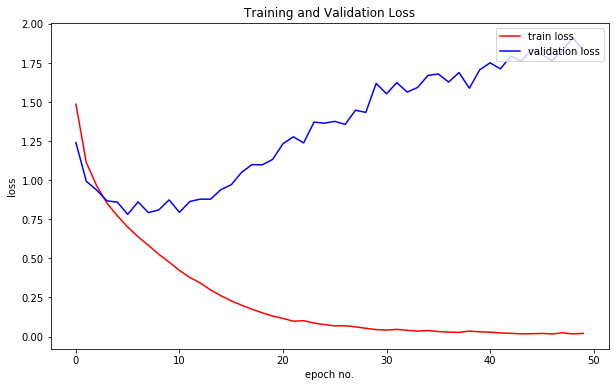

In [25]:
# Plot loss
plt.rcParams["figure.figsize"] = (10, 6)
x = range(len(epoch_train_loss))


plt.figure
plt.plot(x, epoch_train_loss, color='r', label="train loss")
plt.plot(x, epoch_test_loss, color='b', label="validation loss")
plt.xlabel('epoch no.')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# <font style="color:blue">13. Plot Accuracy</font>

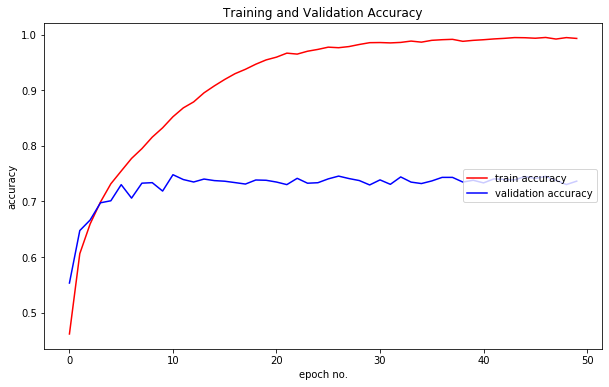

In [26]:
# Plot loss
plt.rcParams["figure.figsize"] = (10, 6)
x = range(len(epoch_train_loss))


plt.figure
plt.plot(x, epoch_train_acc, color='r', label="train accuracy")
plt.plot(x, epoch_test_acc, color='b', label="validation accuracy")
plt.xlabel('epoch no.')
plt.ylabel('accuracy')
plt.legend(loc='center right')
plt.title('Training and Validation Accuracy')
plt.show()

# <font style="color:blue">14. Loading the Model </font>


In [27]:
# initialize the model
cnn_model = MyModel()

models = 'models'

model_file_name = 'cifar10_cnn_model.pt'

model_path = os.path.join(models, model_file_name)

# loading the model and getting model parameters by using load_state_dict
cnn_model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

# <font style="color:blue">15. Model Prediction</font>


In [28]:
def prediction(model, train_config, batch_input):
    
    # send model to cpu/cuda according to your system configuration
    model.to(train_config.device)
    
    # it is important to do model.eval() before prediction
    model.eval()

    data = batch_input.to(train_config.device)

    output = model(data)

    # Score to probability using softmax
    prob = F.softmax(output, dim=1)

    # get the max probability
    pred_prob = prob.data.max(dim=1)[0]
    
    # get the index of the max probability
    pred_index = prob.data.max(dim=1)[1]
    
    return pred_index.cpu().numpy(), pred_prob.cpu().numpy()

# <font style="color:blue">16. Perform Inference on sample images </font>

For prediction, we need to transform the data in the same way as we have done during training. 

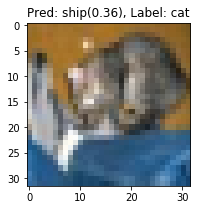

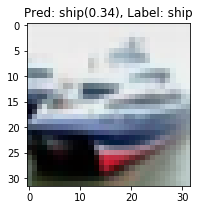

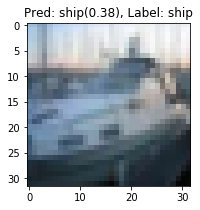

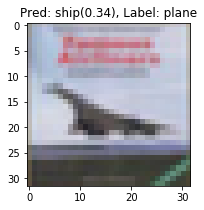

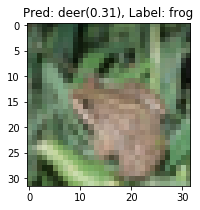

In [29]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

batch_size = 5
train_config = TrainingConfiguration()

if torch.cuda.is_available():
    train_config.device = "cuda"
else:
    train_config.device = "cpu"
    
    

# load test data without image transformation
test = torch.utils.data.DataLoader(
    datasets.CIFAR10(root=train_config.data_root, train=False, download=False, 
                   transform=transforms.functional.to_tensor),
    batch_size=batch_size,
    shuffle=False,
    num_workers=1
    )

try:
    mean, std = get_mean_std_train_data(data_root)
    assert len(mean) == len(std) == 3
except:
    mean = (0.5, 0.5, 0.5)
    std = (0.5, 0.5, 0.5)

# load testdata with image transformation
image_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
    ])

test_trans = torch.utils.data.DataLoader(
    datasets.CIFAR10(root=train_config.data_root, train=False, download=False, transform=image_transforms),
    batch_size=batch_size,
    shuffle=False,
    num_workers=1
    )

for data, _ in test_trans:
    # pass the loaded model
    pred, prob = prediction(cnn_model, train_config, data)
    break
    

plt.rcParams["figure.figsize"] = (3, 3)
for images, label in test:
    for i, img in enumerate(images):
        img = transforms.functional.to_pil_image(img)
        plt.imshow(img)
        plt.gca().set_title('Pred: {0}({1:0.2}), Label: {2}'.format(classes[pred[i]], prob[i], classes[label[i]]))
        plt.show()
    break

# <font style="color:blue">17. Report your findings</font>
- 
- 

# <font style="color:blue">References</font>

1. https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
1. https://pytorch.org/tutorials/beginner/saving_loading_models.html